## 1. customerSalesMap
This notebook contains detailed explanations of the customerSalesMap function provided by the api. These explanations represent the logic behind the functions and show small examples.

### 1.1. Goal
The aim of customerSalesMap functions is to visualise the sales of a given customer.  

### 1.2. Function Template
#### Input
localhost:8086/customerSalesMap?jsonData={"id": 90412, "xAxis":0, "yAxis": 6, "type": 1, "slots": [{"x":0,"y":10},{"x":10,"y":20},{"x":20,"y":24}]}

#### Output
{"image_url": "/files/90412_0_6_1.png"}

In order to access the image file, IP address of the server and Port number should be added to the beginning of image url.

In this case, the image can be accessed at 212.57.2.68:8086/files/90412_0_6_1.png .

### 1.3. Logic
The sales done by each customer are stored in SalesTensor table in the database. Each sale entry is represented as

<center>(WeekIndex, DowIndex, HourIndex, ItemIndex, ItemG3Index, CustomerIndex, Amount)</center> 

With this representation, we can analyze customers' purchasing behaviors based on different point of views. 

In order to visualize the sales records of a customer, we need to reduce the dimensionality of each sales record. The original sales records can be considered as a 6-dimensional data cube in which the first dimension corresponds to WeekIndex, second dimension corresponds to DowIndex, and so on. Our aim is to reduce the dimension count to 1 (histogram of sale) or 2 (matrix of sale) and then plot the behaviour.  

In Figure 1.1, a view of SalesTensor in the database is illustrated. The entries shows some sales done by customer 0. Note that DowIndex (day of week) values 0, ..., 6 corresponds to Monday, ..., Sunday respectively.

|WeekIndex|DowIndex|HourIndex|ItemIndex|ItemG3Index|CustomerIndex|Amount|
|--|-------------------------------|
|0 |5 |10|0 |150 |0|2|
|1 |5 |10|4|90 |0|4|
|2 |2 |18|0 |150 |0 |2|
|2 |6 |9|15 |10|0 |1|
|5 |1 |20|30 |20|0 |10|
|5 |1 |20|0 |150|0 |2|
|5 |1 |20|20 |100|0 |5|

<center>Figure 1.1. Sales of customer 0 in SalesTensor table</center>

Main idea behind the customerSalesMap function is summing the entries of SalesTensor table based on given dimensions.

For instance, if we want to visualize a sales matrix whose X axis corresponds to HourIndex and Y axis corresponds to DowIndex, we need to achieve the data in Figure 1.2. If we look at first two entries of above table, it can be seen that the customer went to the store at 0th and 1st weeks on Saturday at 10h00, bought two different items, paid 2 and 4 TL. Since we want to visualize Dow vs Hour matrix of that customer, we are focusing on corresponding columns of that table and sum the amount of money. 

|DowIndex|HourIndex|Amount|
|--|-------------------------------|
|5 |10|6|
|2 |18|2|
|6 |9 |1|
|1 |20|17|

<center>Figure 1.2. Dow - Hour sales matrix of customer 0</center>

The visualization of this example is shown in Figure 1.3. Colors from dark blue to red represent values from 0 to larger ones. 

<img src="../otherFiles/Section2_DowH.png">
<center>Figure 1.3. Dow - Hour sales matrix of customer 0</center>

If we want to view the sales records as a histogram (i.e. based on HourIndex), we will have the table view showed in Figure 1.4 and histogram in Figure 1.5.

|HourIndex|Amount|
|--|-------------------------------|
|10|6|
|18|2|
|9 |1|
|20|17|

<center>Figure 1.4. Hour sales histogram of customer 0</center>


<img src="../otherFiles/Section2_H.png">
<center>Figure 1.5. Hour sales histogram of customer 0</center>

### 1.3. Type

Type parameter defines how the sales matrix or sales histogram will be visualized. 

Type may have the following values: 

|Type|Description|
|--|-------------------------------|
|1|Total Sales Amount|
|2|Whether a sale is done or not (0 or 1. Binary representation)|

<center>Figure 1.6. Type Types</center>

When the type is "1", the sales matrix / histogram will be visualized as it is (each entry corresponds to the amount of money). When the type is "2", the sales matrix / histogram will be converted to a binary representation. The binary representation of HourIndex sales histogram is shown below. 

|HourIndex|Amount|
|--|-------------------------------|
|10|1|
|18|1|
|9 |1|
|20|1|

<center>Figure 1.7. Binary Representation of Hour Sales Histogram</center>

The corresponding sales histogram will look as in Figure 1.8.

<img src="../otherFiles/Section2_H2.png">
<center>Figure 1.8. Binary Hour sales histogram of customer 0</center>

### 1.4. Axis 
customerSalesMap function support axis values from 0 to 6. The values and their meanings are shown below: 

|0 |1 |2 |3 |4 |5 |6 |
|--|-------------------------------|
|Week|Dow|Hour|Item|Weblog Matrix|Weblog Graph|Time Slot|

<center>Figure 1.9. Values of axis parameter </center>

There are different approaches based on the axis values:

#### If both axis values are in [0, 1, 2, 3]
If both X and Y axis values are 0, 1, 2 or 3; we will reduce the dimensionality of sales table and visualize the sales (as described in above sections). 

Example graphs of a real customer (whose customer id is 90412) on the database are shown below:

<img src="../otherFiles/90412_0_3_1.png" width="400">
<center>Figure 1.10. Week - Item Group sales matrix of customer 90412. xAxis=0, yAxis=3, type=1</center>

<img src="../otherFiles/90412_1_2_1.png" width="400">
<center>Figure 1.11. Dow - Hour sales matrix of customer 90412. xAxis=1, yAxis=2, type=1</center>

<img src="../otherFiles/90412_0_2_2.png" width="400">
<center>Figure 1.12. Week - Hour sales matrix of customer 90412 (when type=2). xAxis=0, yAxis=2, type=2</center>

If both X and Y axis parameters have the same value, the sales histogram will be generated. 

Examples of sales histograms are shown in Figure 1.13 and Figure 1.14.

<img src="../otherFiles/90412_0_0_1.png" width="400">
<center>Figure 1.13. Week sales histogram of customer 90412. xAxis=0, yAxis=0, type=1</center>

<img src="../otherFiles/90412_2_2_2.png" width="400">
<center>Figure 1.14. Hour sales histogram of customer 90412 (when type=2). xAxis=2, yAxis=2, type=2</center>

#### If both axis values are in [4, 5]
Obase provides web browsing activities of some customers. When the axis values are 4 or 5, the web browsing activities will be displayed as a matrix or a graph. 

Examples of customer 90412 are shown in Figure 1.15 and Figure 1.16.

<img src="../otherFiles/90412_webmatrix.png" width="600">
<center>Figure 1.15. Weblog matrix of customer 90412. xAxis=4, yAxis=4</center>

<img src="../otherFiles/90412_webgraph.png" width="600">
<center>Figure 1.16. Weblog graph of customer 90412. xAxis=4, yAxis=4</center>

Both of the choices represent the same browsing data in two different ways. Weblog Matrix represents the consecutive actions performed by the customer (i.e. Login, Add Items To Cart, Confirm Order etc.) as a matrix whereas Weblog Graph represent these transitions as a graph. 

#### If axis values contain [6]
Time slots option provides a more general look to HourIndex dimension. Given slot values as parameter, the function groups hours. 

For instance, we have customer whose sales matrix is shown below:

|DowIndex|HourIndex|Amount|
|--|-------------------------------|
|5 |10|6|
|5 |13|12|
|2 |18|4|
|6 |9 |20|
|6 |15 |15|
|1 |20|17|

<center>Figure 1.17. Dow - Hour sales matrix of customer 0</center>

If 3 time slots which contain the hour ranges (TimeSlot 1, 2 and 3) [0,7), [7,19) and [19,24) are given, the sales matrix will become as shown in Figure 1.18.

|DowIndex|TimeSlot|Amount|
|--|-------------------------------|
|5 |TS 2|18|
|2 |TS 2|4|
|6 |TS 2 |35|
|1 |TS 3|17|

<center>Figure 1.18. Dow - Time Slot sales matrix of customer 0</center>

Examples of customer 90412 three time slots are displayed in Figure 1.19 and Figure 1.20. In both figures, we observe that the customer did not purchase any items in third time slot whereas most of the transactions are done in the second time slot.

<img src="../otherFiles/90412_0_6_1.png" width="400">
<center>Figure 1.19. Week - Time Slot sales matrix of customer 90412. xAxis=0, yAxis=6</center>

<img src="../otherFiles/90412_1_6_1.png" width="400">
<center>Figure 1.20. Dow - Time Slot sales matrix of customer 90412. xAxis=1, yAxis=6</center>

### 1.5. Implementational Details 
#### 1.5.1. Function Hierarchy 
TornadoServer.py file contains main server codes. When a request is sent to the server, it calls the corresponding class. In our case, the class is named CustomerSalesMap.

First, the class will check the base cases. The base cases in our current implementation are:
    * Checking customer validity
    * Checking criteria 
    * Checking axis values
    * Checking weblog activity
    
Based on the given X and Y axis values, CustomerSalesMap will call functions from WeblogFunctions.py (webBrowseMatrix or webBrowseGraph) or SalesFunctions.py (getCustomerSalesMap). 

#### webBrowseMatrix
Returns the weblog matrix of the customer.

#### webBrowseGraph
Generates the weblog graph.

#### getCustomerSalesMap
Generates the customer sales matrix or histogram based on given parameters. 

The code segment below generates the example plots of this notebook.

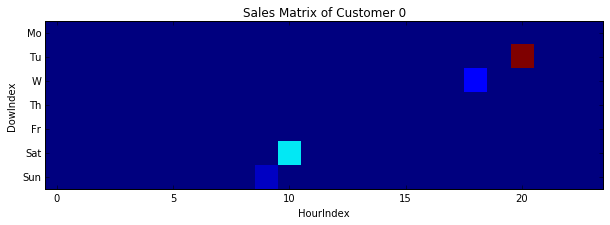

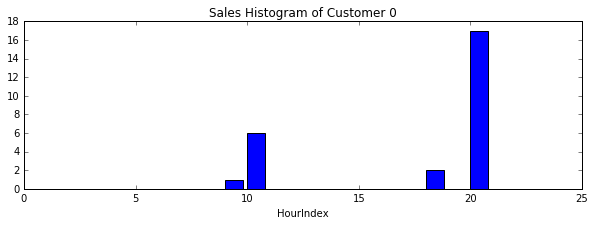

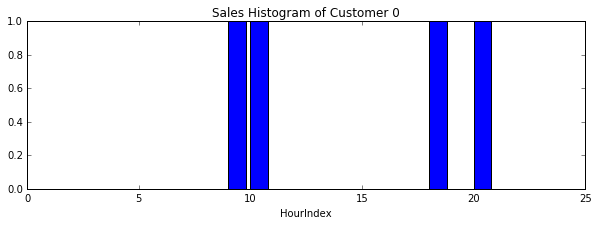

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

salesMatrix = np.zeros((7,24))
salesMatrix[5,10] = 6
salesMatrix[2,18] = 2
salesMatrix[6,9] = 1
salesMatrix[1,20] = 17

fig = plt.figure(num=None, figsize=(10,3), dpi=80, facecolor='w',  edgecolor='k')
plt.imshow(salesMatrix, aspect='auto', interpolation='nearest')
plt.xlabel("HourIndex")
plt.ylabel("DowIndex")
plt.yticks(np.arange(7), ['Mo','Tu','W','Th','Fr','Sat','Sun'])
plotTitle = "Sales Matrix of Customer 0" 
plt.title(plotTitle)
figureTitle = "../otherFiles/Section2_DowH.png" 
plt.savefig(figureTitle)


salesHistogram = np.zeros((1,24))
salesHistogram[0,10] = 6
salesHistogram[0,18] = 2
salesHistogram[0,9] = 1
salesHistogram[0,20] = 17

fig = plt.figure(num=None, figsize=(10,3), dpi=80, facecolor='w', edgecolor='k')
plt.bar(np.arange(salesHistogram.shape[1]), salesHistogram[0,:],  color='b', label='Real Sales')
plt.xlabel("HourIndex")
plotTitle = "Sales Histogram of Customer 0" 
plt.title(plotTitle)
figureTitle = "../otherFiles/Section2_H.png" 
plt.savefig(figureTitle)


salesHistogram = np.zeros((1,24))
salesHistogram[0,10] = 1
salesHistogram[0,18] = 1
salesHistogram[0,9] = 1
salesHistogram[0,20] = 1

fig = plt.figure(num=None, figsize=(10,3), dpi=80, facecolor='w', edgecolor='k')
plt.bar(np.arange(salesHistogram.shape[1]), salesHistogram[0,:], color='b', label='Real Sales')
plt.xlabel("HourIndex")
plotTitle = "Sales Histogram of Customer 0" 
plt.title(plotTitle)
figureTitle = "../otherFiles/Section2_H2.png" 
plt.savefig(figureTitle)